# Missing Values

In [115]:
import pandas as pd
import numpy as np
import seaborn as sb 

In [116]:
df=pd.read_csv('titanic_train.csv')

In [117]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [118]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [119]:
df[df['embarked'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


In [120]:
df=df.drop(columns=['body','home.dest'])

In [121]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,0


#2. Missing data not at random 

In [122]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
survived          0
dtype: int64

In [123]:
df['cabin']=np.where(df['cabin'].isnull(),1,0)

In [124]:
df.head()
df.cabin.mean()

0.7752941176470588

In [125]:
df.groupby(['survived'])['cabin'].mean()

survived
0    0.880819
1    0.594249
Name: cabin, dtype: float64

In [126]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,1,Q,13,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,1,S,NaN,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,1,S,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,1,S,4,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,1,S,NaN,0


# Mean/Mode/Median Imputation

In [127]:
df=pd.read_csv('titanic_train.csv')

In [128]:
columns=['age','fare','survived']

In [129]:
df=df[columns]

# let us go for see % missing values

In [130]:
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [131]:
def imput_nan(df,variable,median):
    df[variable+'_mean']=df[variable].fillna(median)

In [132]:
median=df.age.median()

In [133]:
imput_nan(df,'age',median)
df.head()

,age,fare,survived,age_mean
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


In [134]:
print(df['age'].std())
print(df['age_mean'].std())

14.562243434125529
12.999022882894222


In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

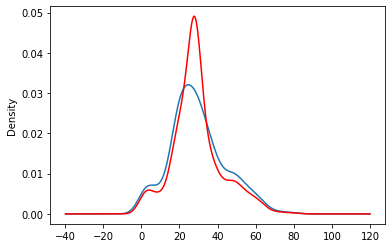

In [136]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df['age_mean'].plot(kind='kde',color='red')

# Random sample Imputation

In [137]:
df.head()

,age,fare,survived,age_mean
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


In [138]:
df['age'].dropna().sample(df['age'].isnull().sum())

660    35.0
61     23.0
760    18.0
732    23.0
320    25.0
       ... 
532    26.0
162    25.0
324    28.0
333    30.0
348    62.0
Name: age, Length: 174, dtype: float64

In [139]:
df.isnull().sum()

age         174
fare          1
survived      0
age_mean      0
dtype: int64

In [140]:
def imput_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [141]:
median=df['age'].median()

In [142]:
imput_nan(df,'age',median)

In [143]:
df.head()

,age,fare,survived,age_mean,age_median,age_random
0,NaN,7.7333,1,28.0,28.0,27.0
1,38.0,8.6625,0,38.0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0,54.0
4,40.0,13.0000,0,40.0,40.0,40.0


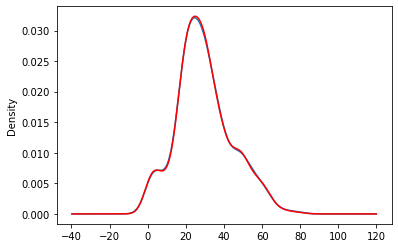

In [144]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_random.plot(kind='kde',color='red')

# Capturing Nan alues with a new feature

In [145]:
pd=pd.read_csv('titanic_train.csv',usecols=['age','fare','survived'])

In [147]:
pd.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [148]:
df['age_nan']=np.where(df['age'].isnull(),1,0)

In [149]:
df.head()

,age,fare,survived,age_mean,age_median,age_random,age_nan
0,NaN,7.7333,1,28.0,28.0,27.0,1
1,38.0,8.6625,0,38.0,38.0,38.0,0
2,30.0,24.1500,0,30.0,30.0,30.0,0
3,54.0,23.0000,1,54.0,54.0,54.0,0
4,40.0,13.0000,0,40.0,40.0,40.0,0


### End of Distribution imputation

In [151]:
pd.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002759E0D5D08>,
      dtype=object)

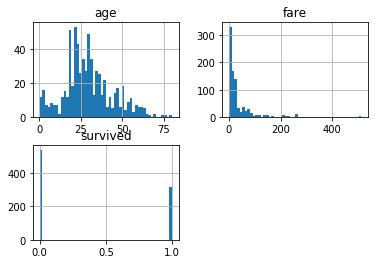

In [152]:
pd.hist(bins=50)

In [157]:
ext=pd.age.median()+3*df.age.std()

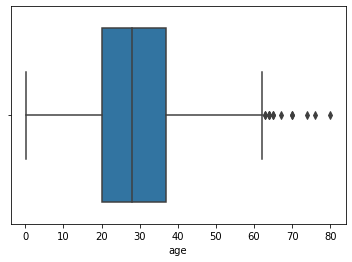

In [158]:
sb.boxplot('age',data=pd)

In [169]:
def imp(pd,variable,ext,median):
    df[variable+"_dist"]=df[variable].fillna(ext)
    df[variable].fillna(median,inplace=True)

In [170]:
imp(pd,"age",ext,pd.age.median())

In [172]:
df.head()

,age,fare,survived,age_mean,age_median,age_random,age_nan,age_dist
0,28.0,7.7333,1,28.0,28.0,27.0,1,71.68673
1,38.0,8.6625,0,38.0,38.0,38.0,0,38.00000
2,30.0,24.1500,0,30.0,30.0,30.0,0,30.00000
3,54.0,23.0000,1,54.0,54.0,54.0,0,54.00000
4,40.0,13.0000,0,40.0,40.0,40.0,0,40.00000


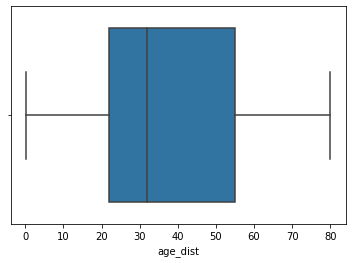

In [173]:
sb.boxplot("age_dist",data=df)

In [174]:
import pandas as pd

In [176]:
data=pd.read_csv("titanic_train.csv",usecols=['age','fare','survived'])

In [177]:
data.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [178]:
def imput(df,variable):
    df[variable+"_hundred"]=df[variable].fillna(100)

In [180]:
da=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
da.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [182]:
da.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [184]:
da.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

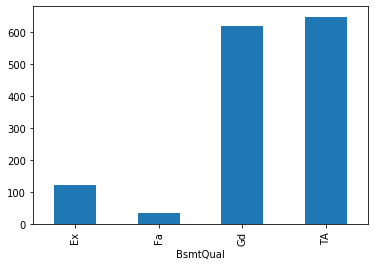

In [189]:
da.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

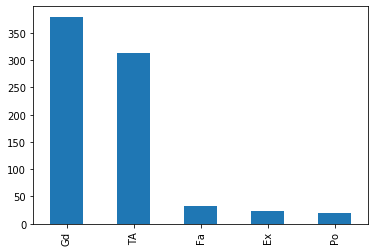

In [191]:
da['FireplaceQu'].value_counts().plot.bar()

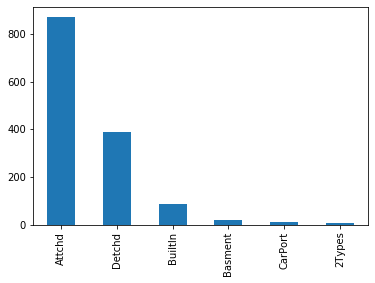

In [192]:
da['GarageType'].value_counts().plot.bar()

In [193]:
da['GarageType'].value_counts().index[0]

'Attchd'

In [197]:
def repla(da,variable):
    most_freq=da[variable].value_counts().index[0]
    da[variable].fillna(most_freq,inplace=True)

In [200]:
for i in da.columns:
        repla(da,i)

In [201]:
da.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [203]:
da.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

# Adding Variable to capture NAN

In [206]:
da=pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
da.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [207]:
da['BsmtQual_var']=np.where(da['BsmtQual'].isnull(),1,0)

In [210]:
da.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [212]:
freq=da["BsmtQual"].mode()[0]

In [213]:
da['BsmtQual'].fillna(freq,inplace=True)

In [214]:
da.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


### Suppose we have more frequent catgories,just replace NAN with new feature

In [215]:
def imp(da,variable):
    da[variable+'Newvar']=np.where(da[variable].isnull(),'Missing',da[variable])
    

In [216]:
for feature in da.columns:
    imp(da,feature)

In [217]:
da.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,BsmtQualNewvar,FireplaceQuNewvar,GarageTypeNewvar,SalePriceNewvar,BsmtQual_varNewvar
0,Gd,NaN,Attchd,208500,0,Gd,Missing,Attchd,208500,0
1,Gd,TA,Attchd,181500,0,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0,Gd,TA,Attchd,250000,0


In [219]:
da.drop(columns=['BsmtQual','FireplaceQu','GarageType'])

,SalePrice,BsmtQual_var,BsmtQualNewvar,FireplaceQuNewvar,GarageTypeNewvar,SalePriceNewvar,BsmtQual_varNewvar
0,208500,0,Gd,Missing,Attchd,208500,0
1,181500,0,Gd,TA,Attchd,181500,0
2,223500,0,Gd,TA,Attchd,223500,0
3,140000,0,TA,Gd,Detchd,140000,0
4,250000,0,Gd,TA,Attchd,250000,0
...,...,...,...,...,...,...,...
1455,175000,0,Gd,TA,Attchd,175000,0
1456,210000,0,Gd,TA,Attchd,210000,0
1457,266500,0,TA,Gd,Attchd,266500,0
1458,142125,0,TA,Missing,Attchd,142125,0
